In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
bikes = pd.read_csv('/Users/jiawenli/Desktop/MBAN_6110T/Class_6/bikes_sharing.csv')

In [13]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


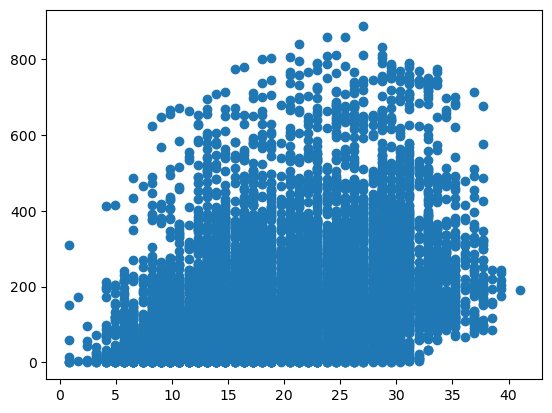

In [5]:
plt.scatter(bikes['temp'],bikes['registered'])

In [6]:
x = bikes['temp']
y = bikes['casual']

In [14]:
# ordinary least-square (ols)
results = ols('casual ~ temp', data=bikes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3037.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:47:59   Log-Likelihood:                -56684.
No. Observations:               10886   AIC:                         1.134e+05
Df Residuals:                   10884   BIC:                         1.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.5710      1.178    -20.855      0.0

R-square of 0.218 indicates that temperature describes 20% of the casual rent variability.

F-statistics tells about whether our model is statistically significant. If it's lower than 0.05, then that's good.

we want a low p value which indicates that our model shows a significant difference. In our case, p-value of 0 shows that our model is statiscally significant, which is good.

Try the model: y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday

In [12]:
53.1426 + 2.9255*9.84- 0.8365*81 - 36.0416*0

14.173019999999994

In [9]:
results_1 = ols('casual ~ temp + humidity + workingday', data=bikes).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2766.
Date:                Tue, 27 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:42:36   Log-Likelihood:                -54939.
No. Observations:               10886   AIC:                         1.099e+05
Df Residuals:                   10882   BIC:                         1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1426      1.663     31.961      0.0

In [10]:
pred_vals = results_1.predict(bikes[['temp','humidity','workingday']])

In [15]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),bikes['casual']],axis=1)

In [16]:
res['error'] = res['y_hat'] - res['casual']

In [17]:
res.head(1)

,y_hat,casual,error
0,14.175362,3,11.175362


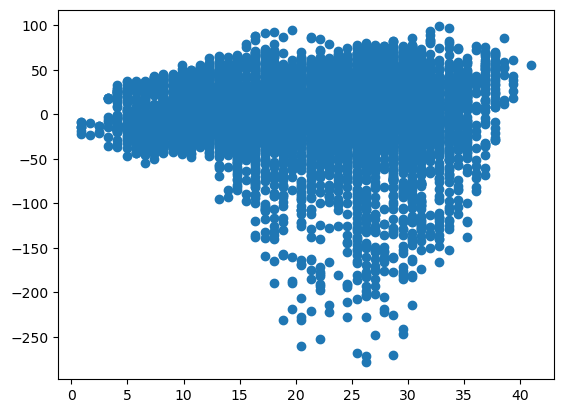

In [18]:
plt.scatter(bikes['temp'],res['error'])